Abhishek Thapliyal
abhishektheironman@gmail.com

Import required libraries for data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Reading the file

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/layilpaht/My-Jupyter-Notebook/main/AC_Data.csv')

Renaming first column

In [3]:
df=df.rename(columns={'0':'Date And Time'})

<u>From dataframe df, I will make 3 more dataframes:-</u>

df1=In it, instead of date and time as index, it will only have dates as index. It will add rows of same date into a single row
<b><p>This will reduce our data based on dates so that we can use this data for temperature analysis (because we have temperature data per day, not for individual time period of the day)</b>

df2=In it, instead of date and time as index, it will have day as index. It will add data of all dates which match a particular day into a single row
<b><p>This will be helpful in analysing consumption of AC vs day of the week. We can figure out which day of week more AC is required and much more</b>

df3=In it, instead of date and time as index, it will have hour of day as index. It will add data of all rows matching a particular hour into a single row
<b><p>This will be helpful in analysing consumption of AC vs hour of the day. We can figure out which time period of the day AC is more consumed and much more</b>

Converting 'Date And Time' Column data type to date type

In [4]:
df['Date And Time'] = pd.to_datetime(df['Date And Time'])


Creating Dataframe df1
<p>1.) Now resetting all "Date and Time" rows into "Date" rows
<p>2.) And then renaming index to "Date"

In [5]:
df1=df.groupby(df['Date And Time'].dt.date).sum()
df1.rename_axis("Date", axis='index', inplace=True)

Creating Dataframe df2
<p>1.) Now resetting all "Date and Time" rows into "Day" rows
<p>2.) And then renaming index to "Day"
<p>3.) In order to arrange rows in proper way, I have reindexed rows

In [6]:
df2=df.groupby(df['Date And Time'].dt.day_name()).sum()
df2.rename_axis("Day", axis='index', inplace=True)
df2=df2.reindex(axis='index',labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

Creating dataframe df3
<p>1.) Now resetting all "Date and Time" rows into "Hour" rows
<p>2.) And then renaming index to "Hour"

In [7]:
df3=df.groupby(df['Date And Time'].dt.hour).sum()
df3.rename_axis("Hour", axis='index', inplace=True)

Setting 'Date And Time' as index column in df

In [8]:
df.set_index('Date And Time', inplace=True)

Now Cleaning time!
<p>Cleaning rows which have all NULL Values

In [9]:
df=df.dropna(how='all')

Now Assuming that left NULL values are basically equal to 0 (meter must have not registered the value due to switch off),hence setting all NULL values to 0

In [10]:
df=df.fillna(0)

DataFrame Showtime!

In [11]:
df

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date And Time,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
2019-08-01 00:06:00,6.665446,9.065626,0.000000,0.000000,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
2019-08-01 00:08:00,6.674838,9.096130,0.000000,0.000000,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 23:51:00,0.000000,6.089533,2.322677,1.422932,0.000000,0.000000,3.729901,3.747301,3.578350,1.714157,5.146438,3.253012,2.464426,2.829701,3.693877,1.992432,3.029462,7.202612
2019-09-30 23:53:00,0.000000,6.046765,2.195754,1.861175,0.813454,0.000000,3.666080,3.017628,3.600397,1.547953,4.379771,3.144666,3.045807,2.693068,4.090679,1.944854,3.048858,7.348333
2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989


In [12]:
df1

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,
2019-08-01,3104.309104,5178.653314,1630.817266,2374.203867,1037.301305,2015.883705,1876.576564,2340.438797,1620.642612,1268.278059,1291.303646,1828.139131,3391.582242,2200.493267,3094.283539,2603.788367,3337.813885,5443.447364
2019-08-02,2858.419734,3593.581977,2089.322640,2271.603933,1178.239035,1685.658280,1678.985550,1068.449478,1895.803388,1267.474739,1441.221452,2011.115215,3687.542111,1693.435960,3199.127000,2471.211457,3193.061892,5596.797988
2019-08-03,2342.643465,3080.604766,2109.504047,1368.851146,986.814506,1839.578327,2291.289651,924.835843,1980.989410,1052.104862,1565.555856,2213.709985,3457.940043,1340.961746,3214.434392,2109.495541,3152.205214,5668.015362
2019-08-04,2950.357777,3138.325802,1849.015820,1113.272698,1099.236903,2546.160319,2014.250945,1116.094952,1790.919247,1209.314592,1311.968897,2169.716325,3532.554241,1585.776477,3307.656537,2055.193141,3216.802219,5907.917356
2019-08-05,2541.984791,2883.849849,1285.868449,647.581450,1202.556730,2731.833220,1787.944404,1182.123289,1869.045967,1020.467613,2410.518340,2237.245534,3003.746657,2011.984857,3593.211800,2487.589814,2740.861509,4394.006700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26,2515.615076,2984.508342,1901.619565,2428.230487,1038.551192,1656.558793,1482.471577,1640.630593,2108.645087,1046.216173,2278.151401,1795.362507,3530.108306,2027.850503,3238.588959,1852.033010,3115.866908,4577.619004
2019-09-27,1649.242239,2362.594738,1194.870389,1886.359334,639.270463,1696.372858,1641.591250,2082.339737,1743.730489,902.940516,1752.334810,1822.315245,3055.262788,1941.948583,2851.417072,1591.519312,3066.362527,4960.847499
2019-09-28,855.507412,2318.290566,1335.310591,1085.769141,935.988260,1559.825738,1345.690516,1668.293851,1757.968040,941.491008,1309.736930,1657.566823,2290.288264,1964.422000,2251.247477,1748.973194,2330.441394,3074.612517


In [13]:
df2

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Day,,,,,,,,,,,,,,,,,,
Sunday,12275.487506,22172.042873,15536.988317,11916.921657,9209.974056,15984.356600,19499.276076,14090.620293,20970.895429,9884.654929,14655.326453,17339.024778,27492.819257,18164.136723,26244.573358,15958.201396,26298.242646,43561.297325
Monday,11402.371832,23687.909430,15237.672403,12057.189401,8513.835907,14240.656124,19289.450103,16487.513204,20684.770771,9347.607363,13982.965971,16710.734350,24118.424146,17599.731896,24156.929601,16321.906231,26570.780612,40975.155117
Tuesday,11866.946107,22871.368517,14962.493816,14918.141565,8262.269915,14584.073018,17865.806119,16354.175255,20158.574125,8769.692263,14003.043846,15611.708003,22181.976145,17268.849101,24488.169205,16761.302654,24116.434772,35569.636216
Wednesday,16374.127716,22008.998247,13946.310474,16888.155183,8333.750945,15105.068370,17928.204350,14545.652319,18020.332007,9198.845230,15923.787059,14968.154373,25684.750380,17788.973982,24591.417405,16425.131237,24593.236987,35775.015117
Thursday,21117.413003,32773.367900,18113.497390,19333.648025,8767.233641,17039.265777,19311.376265,18027.243061,20677.934395,10308.769537,16346.319627,17679.964459,31115.622175,19313.728615,27620.921183,18594.752851,28357.056078,42371.299200
Friday,17942.152731,24598.966806,18073.146236,16203.827677,8987.005079,16516.052891,17538.190925,15837.923031,18257.492153,9837.530431,15243.776726,17708.955816,28065.924108,18397.628889,26361.431939,20174.124629,27373.660926,41570.900741
Saturday,13018.924104,21000.494174,16402.848405,13360.121761,10076.938110,16615.959136,18769.705496,16045.729053,20241.025211,9863.128232,14920.970417,17990.759217,28453.114783,18933.512567,23419.816733,18154.776281,27119.050374,42744.265430


In [14]:
df3

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Hour,,,,,,,,,,,,,,,,,,
0,5761.039236,7840.441324,5230.434542,5005.072643,2914.124698,5712.923525,6503.545022,6198.556479,6852.442187,3540.004834,5793.025315,6306.243492,9200.604799,7407.828924,9093.491123,6591.019575,6272.406915,10327.068487
1,5782.121734,7784.530470,5345.703781,5109.431775,2853.479600,5839.745071,6461.515952,6153.981122,6894.258712,3453.091778,5844.707596,6278.901525,8853.859686,7366.330195,8943.343233,6606.730504,5672.239027,8464.360613
2,5836.807305,7772.800434,5227.485079,5110.610270,2893.029815,5989.977862,6269.662458,6157.450444,6790.559524,3523.349390,5763.683989,6354.519883,8482.703205,7119.103245,9256.941868,6395.922177,5838.786289,7535.459887
3,5808.044451,7709.671472,5112.532693,5005.256966,2876.074579,5843.101104,6155.842720,6013.816950,6677.959708,3549.497679,5907.929840,6337.462772,8240.582578,7111.426703,9124.035665,6206.865806,5882.354259,7544.164360
4,5587.966181,7613.513018,5073.119010,4865.926955,2831.211091,5707.689706,6118.019993,5817.834284,6595.771226,3443.578911,5619.593767,6116.618485,8128.455649,6831.621158,8954.088947,6082.356078,6280.733038,8065.322290
5,5538.506243,7374.414521,4898.000595,4640.218753,2747.449958,5340.864987,5940.207149,5529.171625,6429.364744,3339.426630,5427.049797,5877.445507,7822.047515,6693.821035,8802.823010,5843.666098,6478.191065,8340.688295
6,5081.094057,7078.979062,4803.060014,4509.500125,2605.217497,5126.539230,5940.098900,5331.065152,6416.079379,3185.489766,5120.050743,5574.749612,7719.214298,6210.442841,8406.451615,5551.219834,6867.400896,10169.416420
7,4472.022179,7047.170151,4776.989235,4226.852200,2563.452429,4769.264611,5621.980271,4882.170290,6194.501331,3063.203447,4662.477482,5383.651380,7576.658896,5788.653984,7849.096558,5379.458135,7444.834429,12304.088789
8,3801.826866,6755.207095,4491.425980,4044.768596,2506.393199,4424.972317,5823.153914,4648.320339,5545.456059,2755.437294,4585.371962,4751.826127,7428.845352,5067.245192,7617.703138,4989.535833,8155.374773,14003.749782


# AC With Maximum Consumption

In [15]:
'AC With Maximum Consumption:'+df.sum(axis=0,skipna=True).idxmax()

'AC With Maximum Consumption:AC 18'

# AC With Minimum Consumption

In [16]:
'AC With Minimum Consumption:'+df.sum(axis=0,skipna=True).idxmin()

'AC With Minimum Consumption:AC 5'

Adding new column "Total AC" which is sum of consumption of all AC to all dataframes

In [17]:
df['Total AC']=df['AC 1']+df['AC 2']+df['AC 3']+df['AC 4']+df['AC 5']+df['AC 6']+df['AC 7']+df['AC 8']+df['AC 9']+df['AC 10']+df['AC 11']+df['AC 12']+df['AC 13']+df['AC 14']+df['AC 15']+df['AC 16']+df['AC 17']+df['AC 18']
df1['Total AC']=df1['AC 1']+df1['AC 2']+df1['AC 3']+df1['AC 4']+df1['AC 5']+df1['AC 6']+df1['AC 7']+df1['AC 8']+df1['AC 9']+df1['AC 10']+df1['AC 11']+df1['AC 12']+df1['AC 13']+df1['AC 14']+df1['AC 15']+df1['AC 16']+df1['AC 17']+df1['AC 18']
df2['Total AC']=df2['AC 1']+df2['AC 2']+df2['AC 3']+df2['AC 4']+df2['AC 5']+df2['AC 6']+df2['AC 7']+df2['AC 8']+df2['AC 9']+df2['AC 10']+df2['AC 11']+df2['AC 12']+df2['AC 13']+df2['AC 14']+df2['AC 15']+df2['AC 16']+df2['AC 17']+df2['AC 18']
df3['Total AC']=df3['AC 1']+df3['AC 2']+df3['AC 3']+df3['AC 4']+df3['AC 5']+df3['AC 6']+df3['AC 7']+df3['AC 8']+df3['AC 9']+df3['AC 10']+df3['AC 11']+df3['AC 12']+df3['AC 13']+df3['AC 14']+df3['AC 15']+df3['AC 16']+df3['AC 17']+df3['AC 18']

Now we will use dataframe df2 to compare consumption of AC on different days of the week

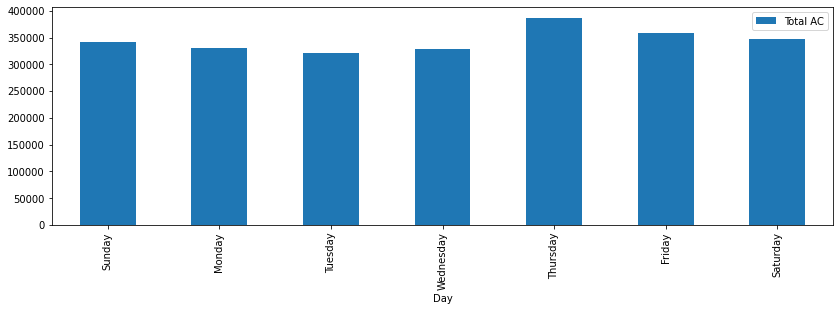

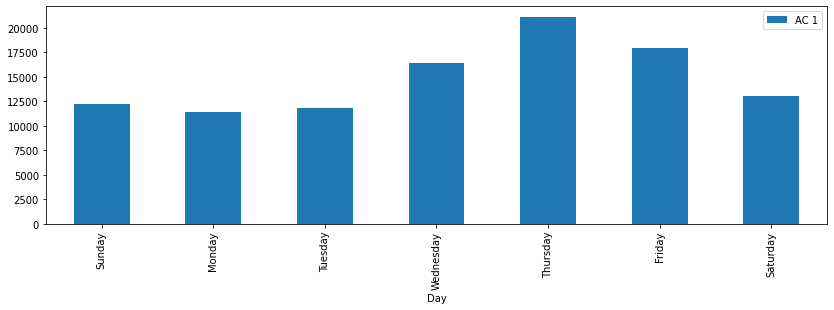

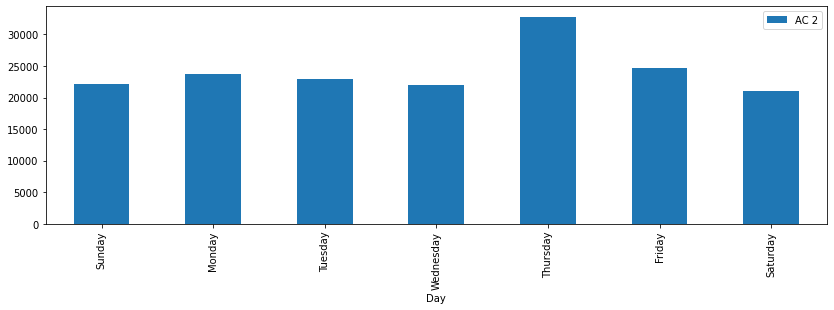

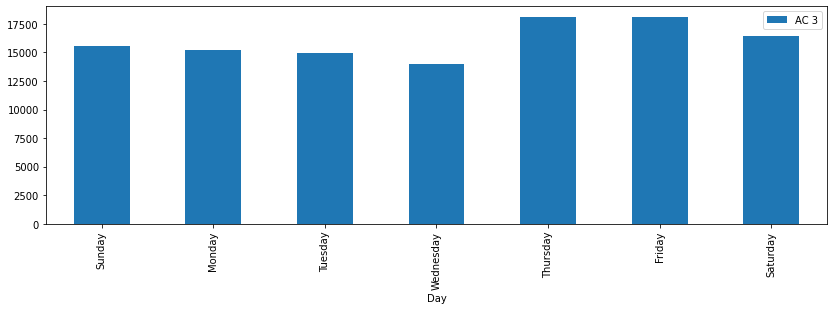

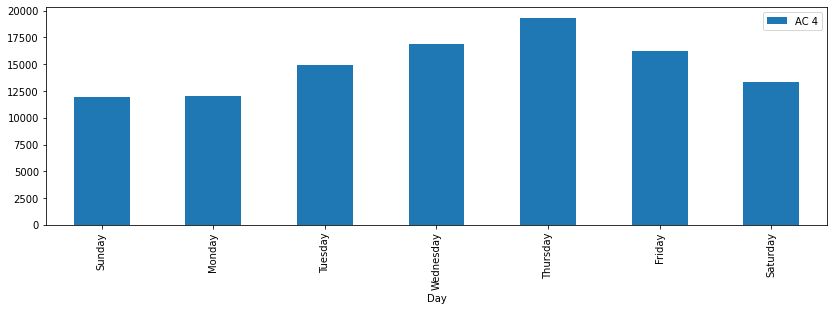

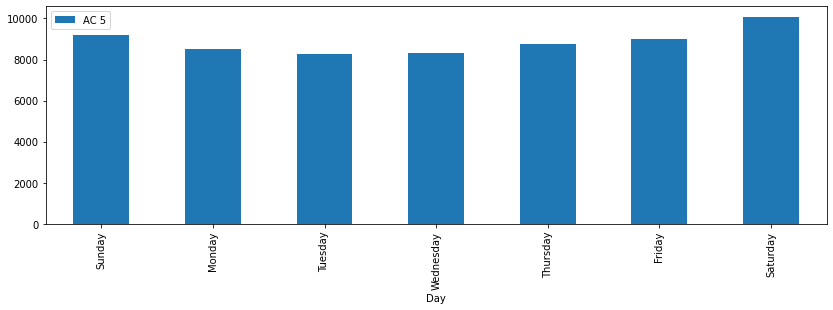

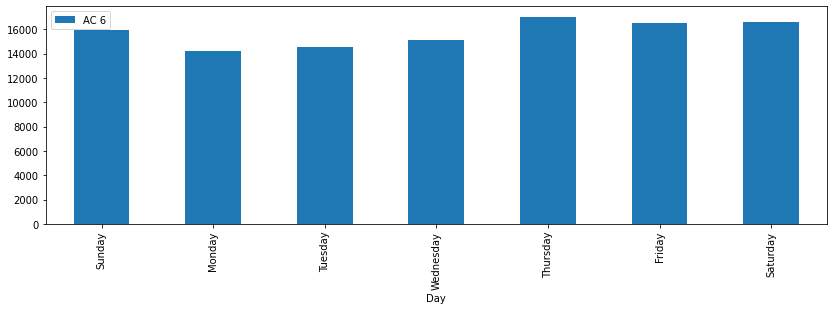

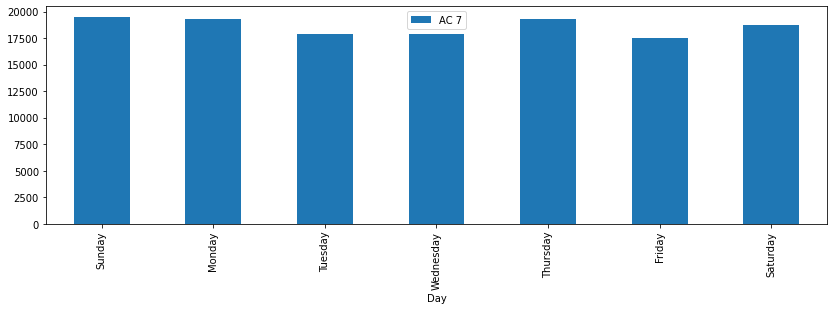

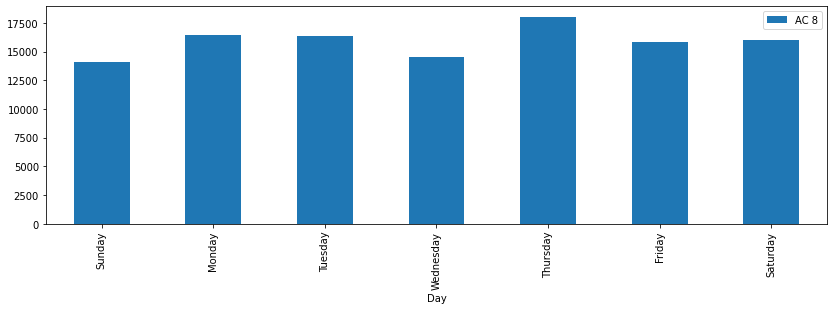

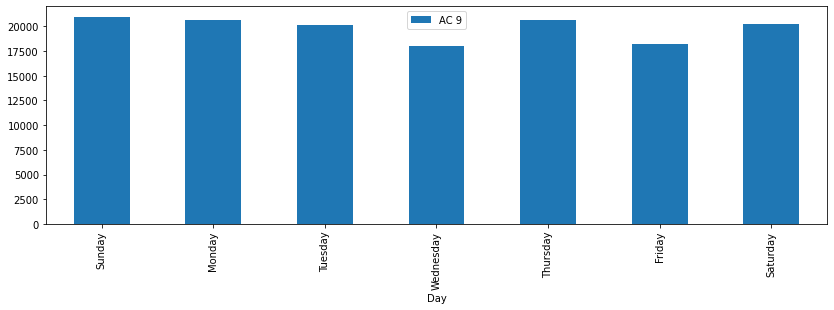

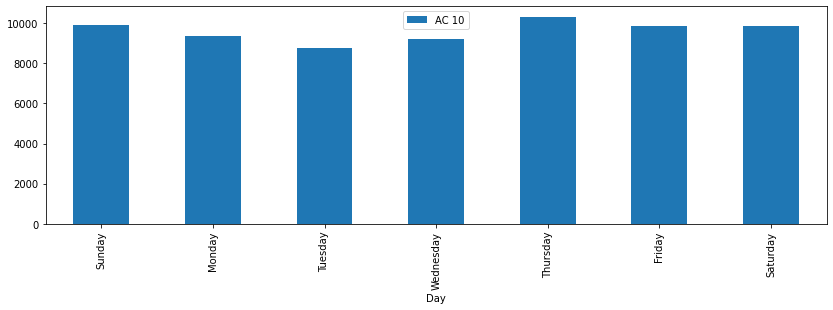

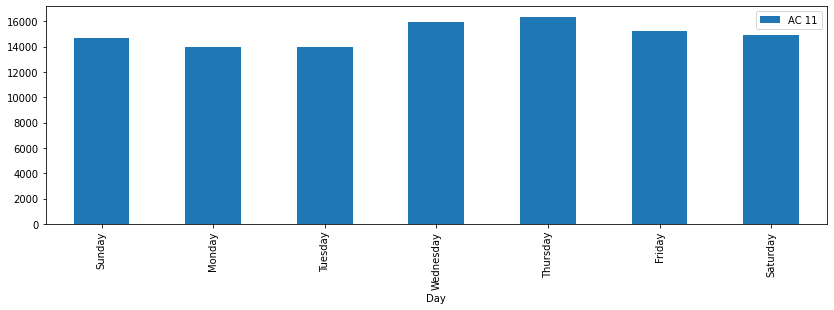

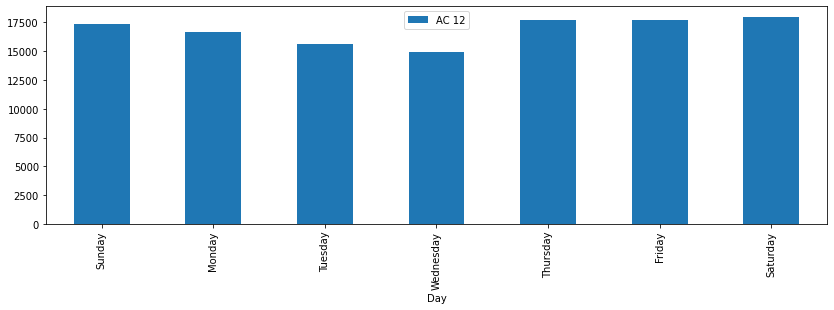

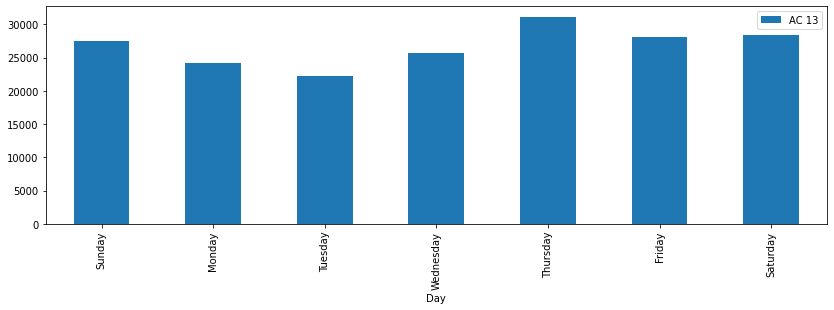

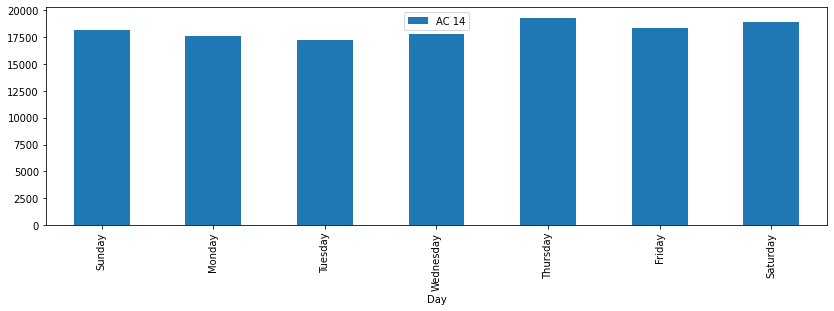

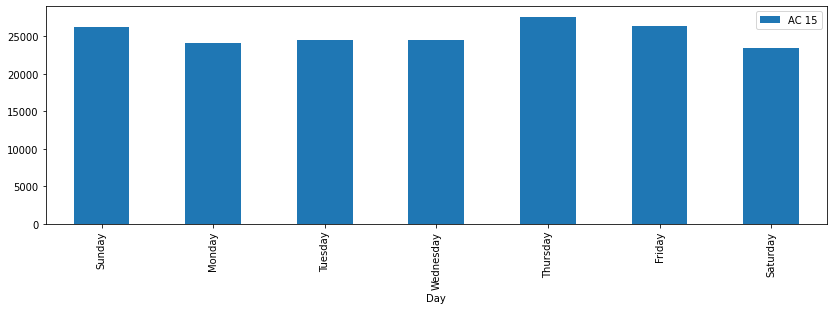

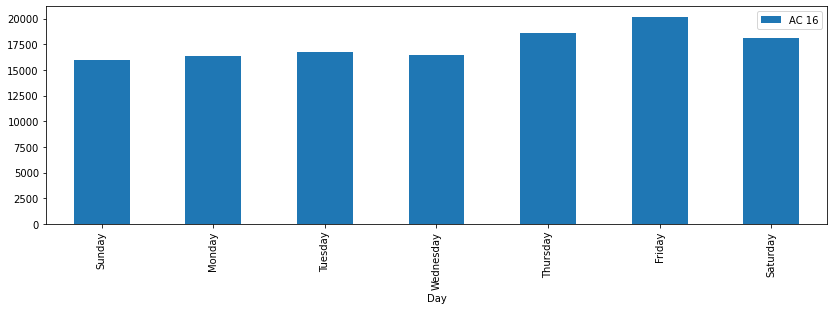

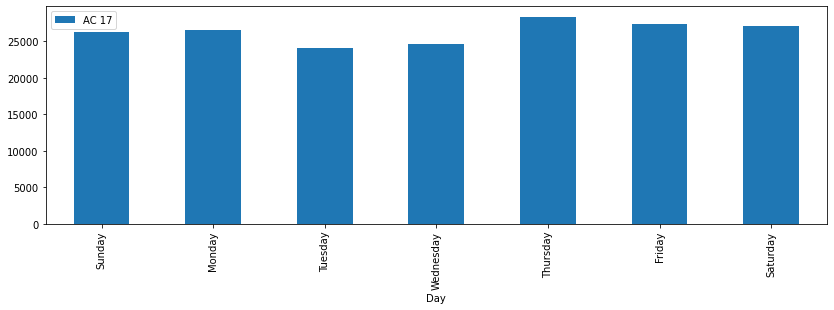

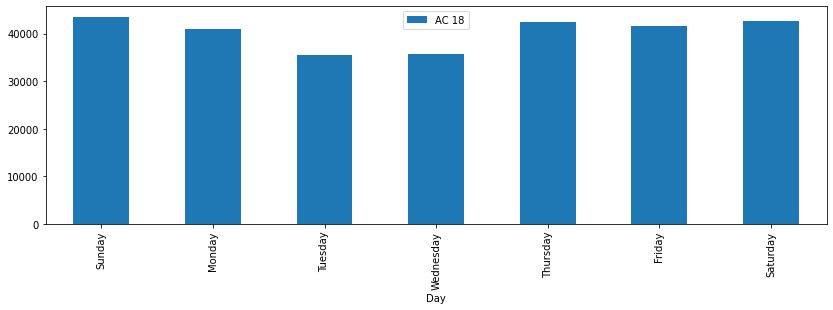

In [18]:
df2.plot(y='Total AC',figsize=(14, 4),kind='bar')
for i in range(18):
    df2.plot(y='AC '+str(i+1),figsize=(14, 4),kind='bar')

By looking at bar graphs, we learn that:-
<p>1.) Overall consumption was high on Thursday. Means that activities must be high during thursday as AC is getting more consumed
<p>2.) Most of the AC also show highest consumption on thursday (there are some exception which we will discuss later on). Looks like they were placed near around
<p>3.) Few AC do not show usual trend (like AC 14). Looks like it was placed at central position where AC was regularly working, irrespective of day of the week
<p>4.) There are no sharp dips in difference of consumption vs days

Now we will use dataframe df3 to compare consumption of AC on different hours of the day

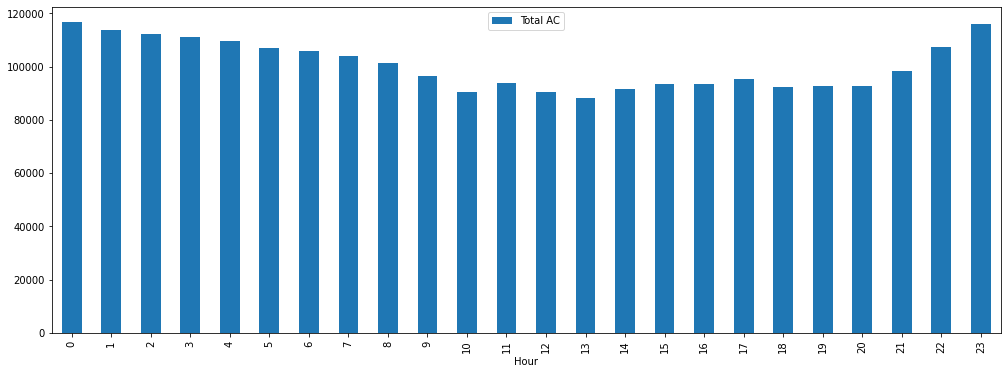

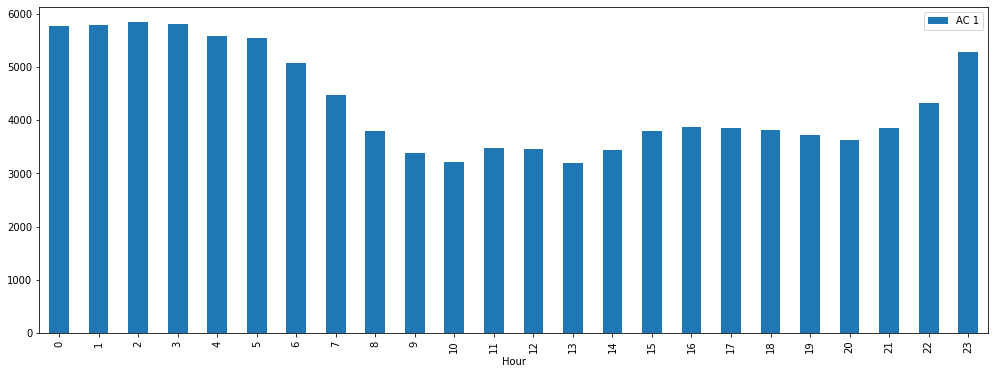

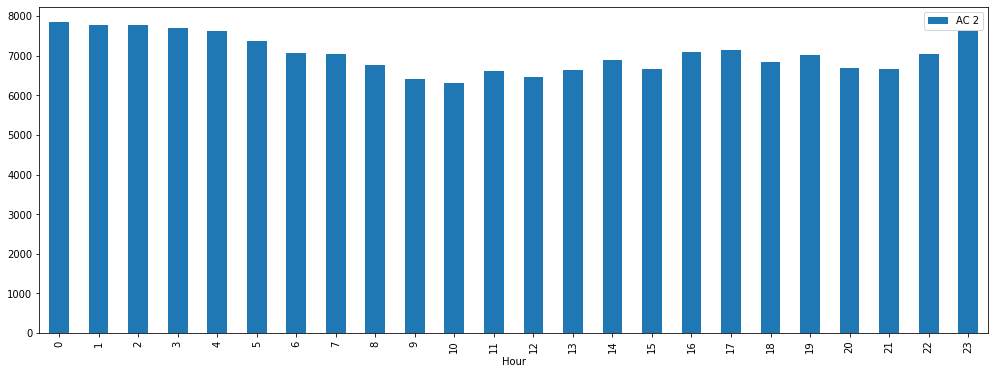

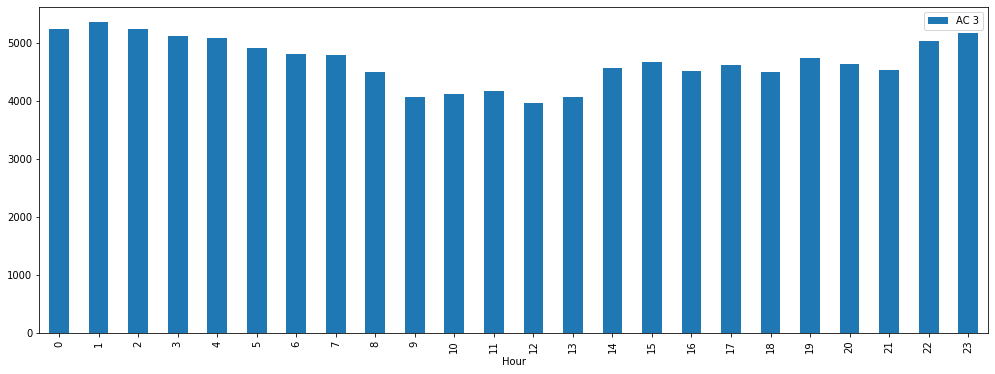

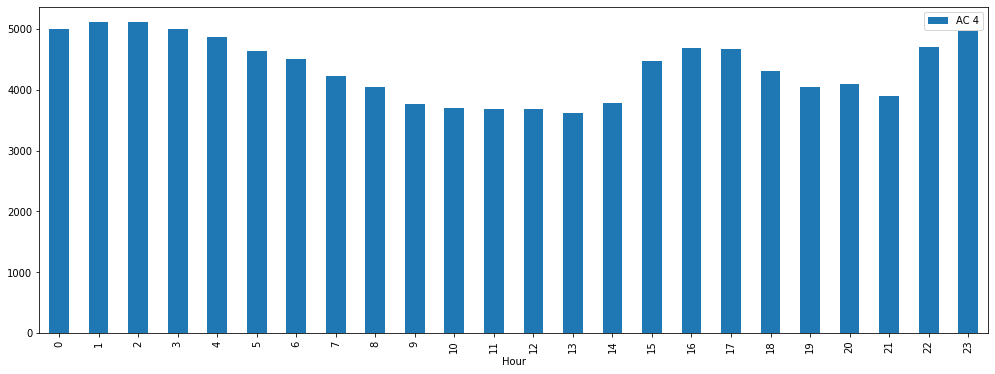

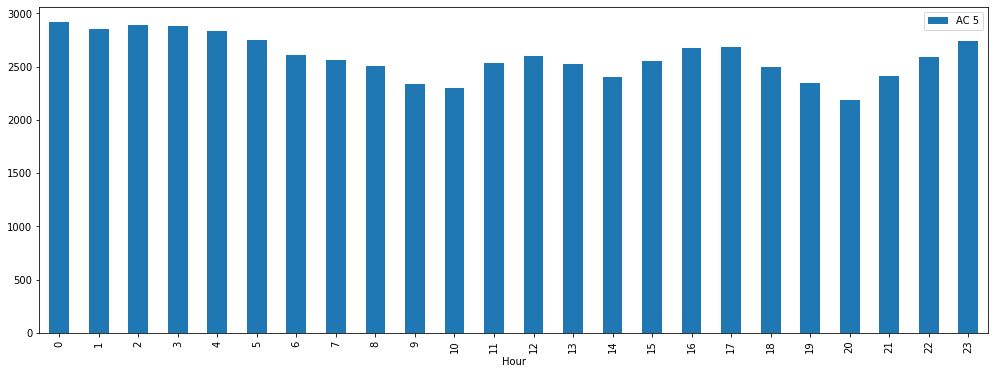

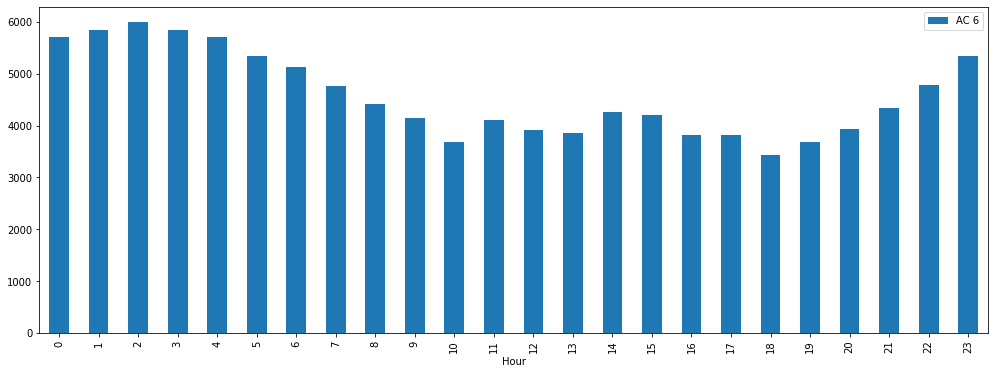

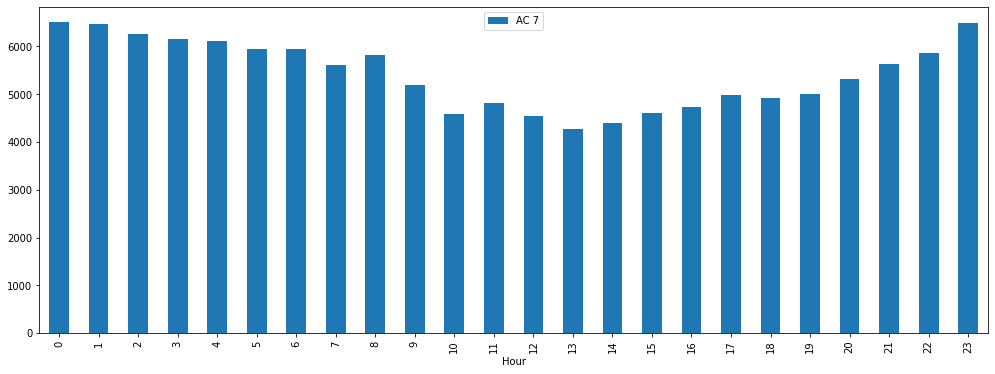

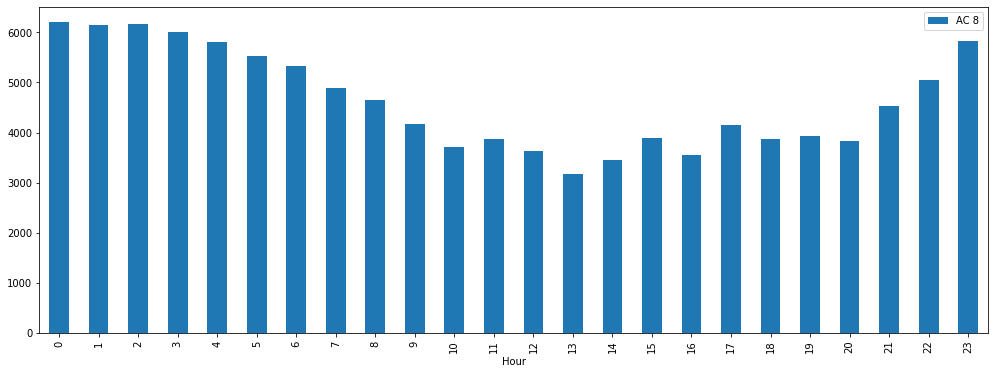

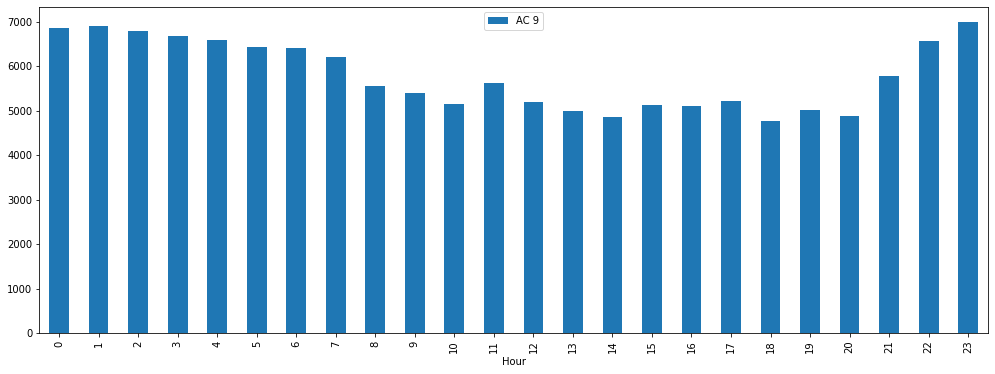

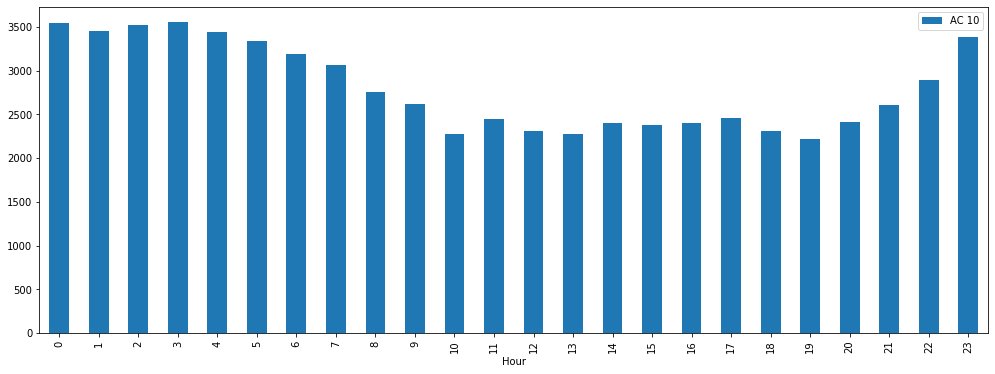

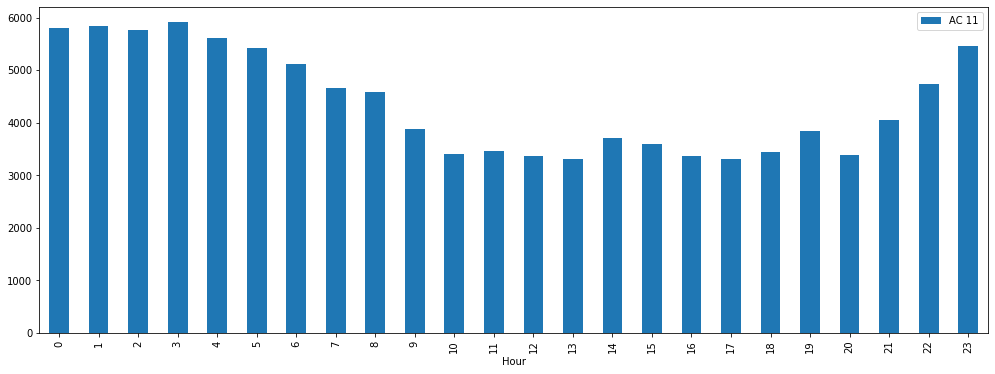

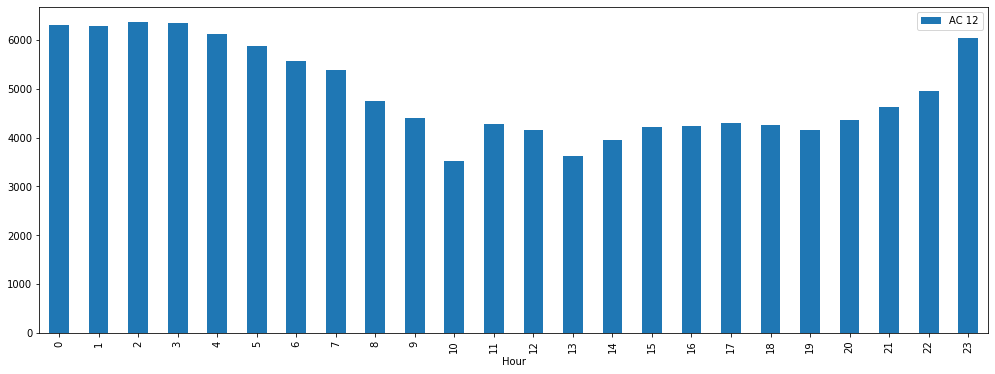

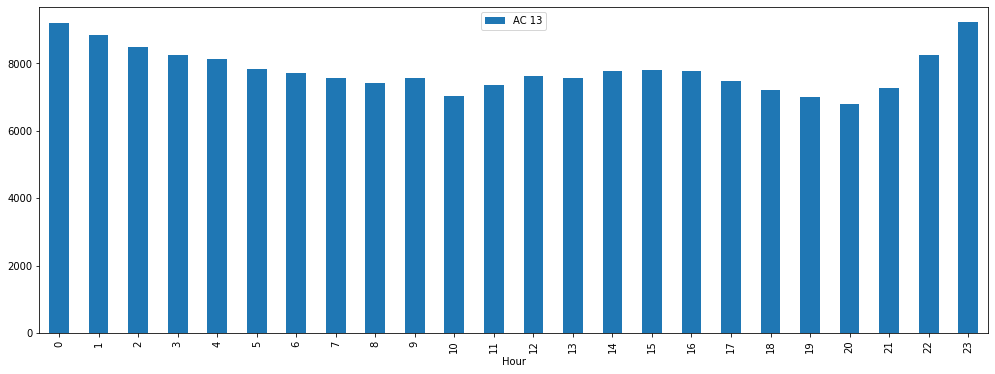

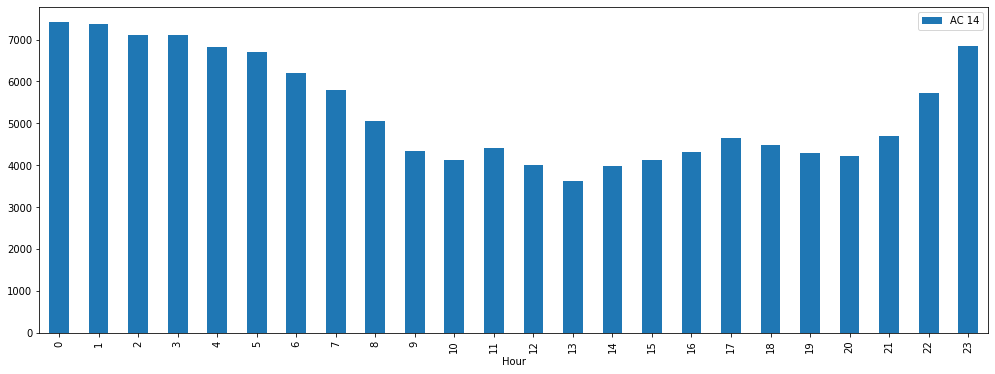

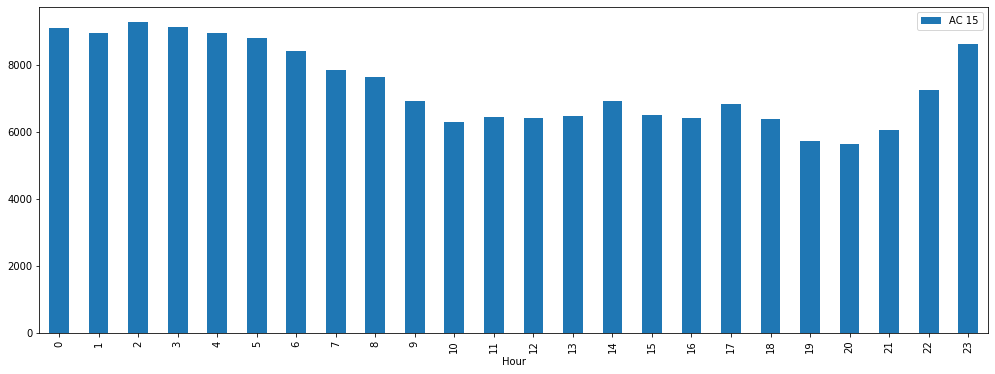

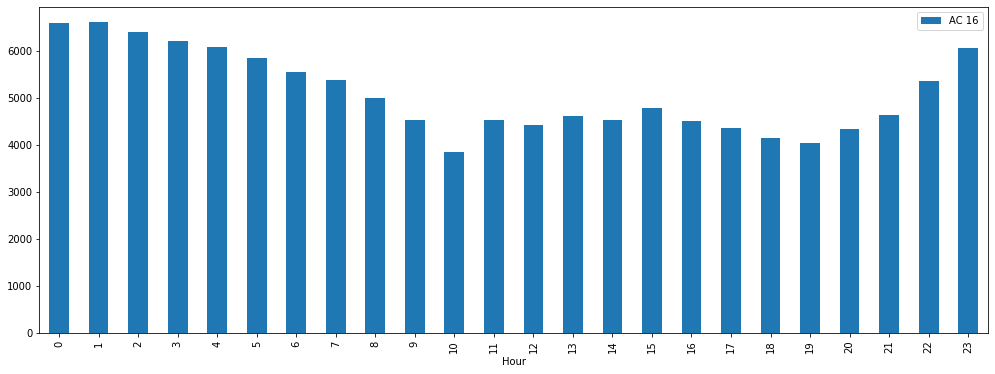

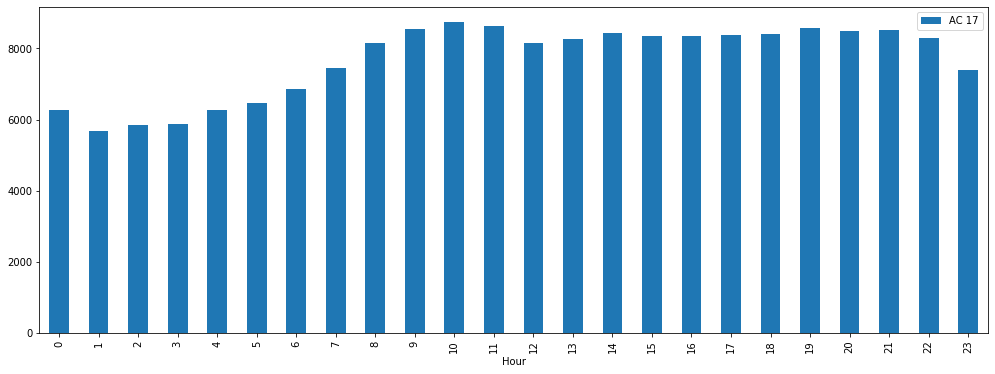

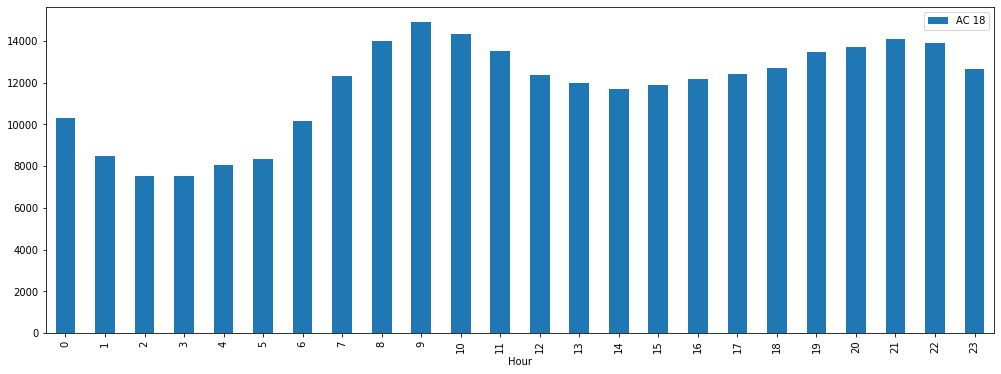

In [19]:
df3.plot(y='Total AC',figsize=(17, 6),kind='bar')
for i in range(18):
    df3.plot(y='AC '+str(i+1),figsize=(17, 6),kind='bar')

By looking at the bar graphs, we learn that:-
<p>1.) Overall consumption was high during night hours as compared to consumption during day hours
<p>2.) And the most unique thing is that except AC 17 and AC 18,this behaviour is exhibited by all AC
<p>3.) In AC 17, consumption was high duing day time, whereas in AC 18, consumption was quite low during night
<p>4.) These points express many things about position of AC where the task was dependent on time of the day(Where workload was duing night time,AC was switched for longer time.Vice versa for other side)

Now I will read temperature from external source
<p>I used NASA website to download dataset for gurgaon (I entered its latitude and longitude and timeperiod for the data) and I got dataset in form of csv file. Unfortunately I got data for per day hence I will use df1 to compare this data (I don't have temperature reading for individual time of a day)
<p>Also since it is free of any disformities hence no cleaning is required for the data

Reading the file

In [20]:
temperature_database= pd.read_csv('https://raw.githubusercontent.com/layilpaht/My-Jupyter-Notebook/main/temperature.csv')

Converting DATE column data type to date data type

In [21]:
temperature_database['DATE'] = pd.to_datetime(temperature_database.YEAR.astype(str) + '-' + temperature_database.MO.astype(str) + '-'+temperature_database.DY.astype(str))

In the dataset, there were many columns which we did not absolutely need,hence I am dropping them

In [22]:
temperature_database=temperature_database.drop(labels='LAT',axis=1)
temperature_database=temperature_database.drop(labels='LON',axis=1)
temperature_database=temperature_database.drop(labels='TS',axis=1)
temperature_database=temperature_database.drop(labels='T2MDEW',axis=1)
temperature_database=temperature_database.drop(labels='T2M_MAX',axis=1)
temperature_database=temperature_database.drop(labels='T2M_MIN',axis=1)
temperature_database=temperature_database.drop(labels='T2M_RANGE',axis=1)
temperature_database=temperature_database.drop(labels='T2MWET',axis=1)
temperature_database=temperature_database.drop(labels='YEAR',axis=1)
temperature_database=temperature_database.drop(labels='MO',axis=1)
temperature_database=temperature_database.drop(labels='DY',axis=1)

Now I will set DATE column as index column
<p>And I will rename 'T2M' column as 'Temperature'

In [23]:
temperature_database.set_index('DATE', inplace=True)
temperature_database=temperature_database.rename(columns={'T2M':'Temperature'})

I will add 'Temperature' column in df1 dataframe

In [24]:
df1['Temperature'] = temperature_database['Temperature']

Now we will use dataframe df1 to compare consumption of AC vs Temperature of the day

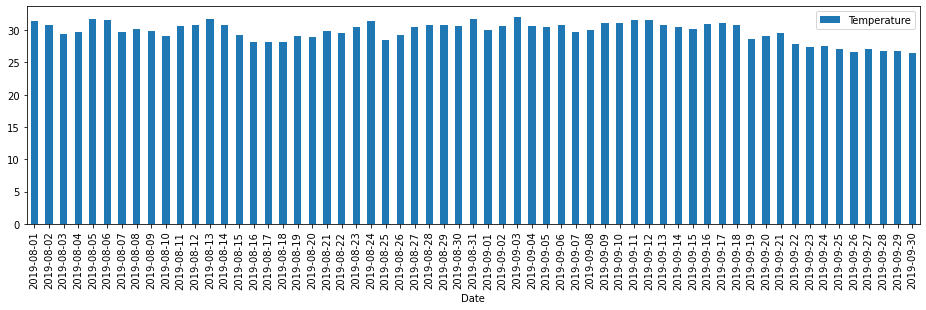

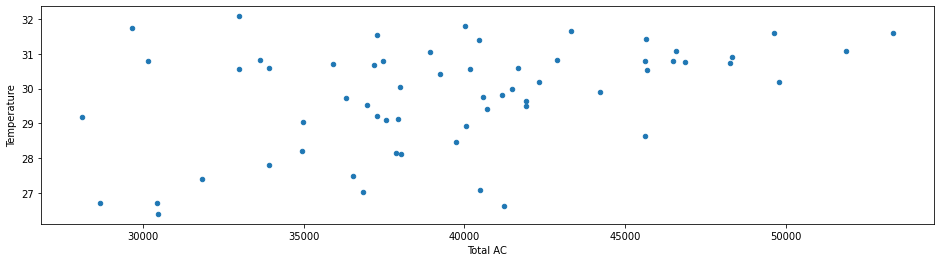

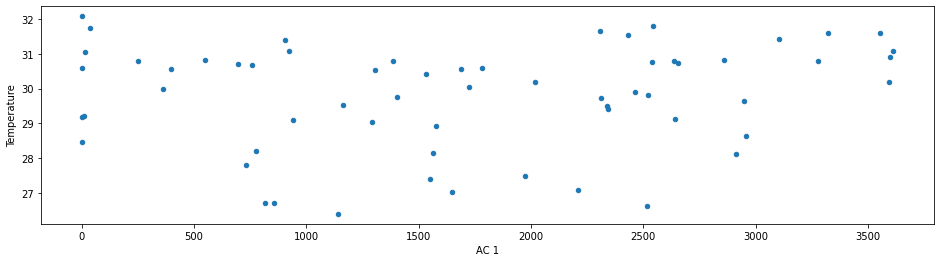

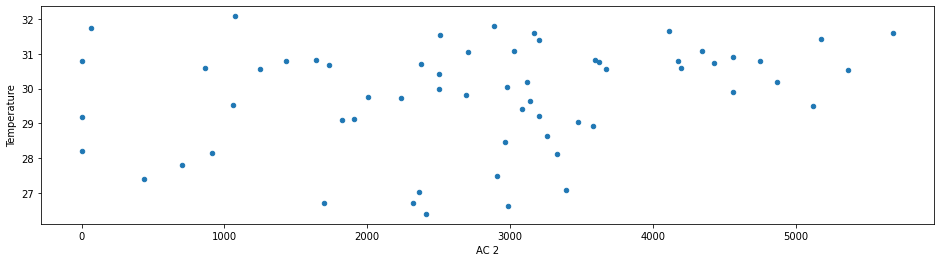

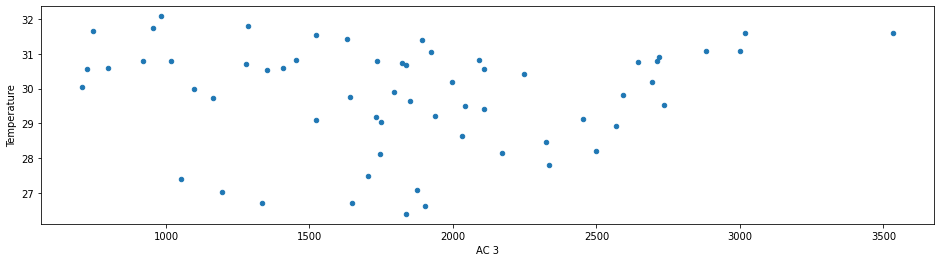

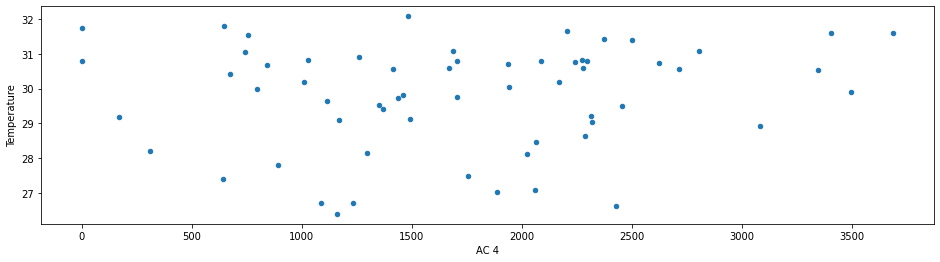

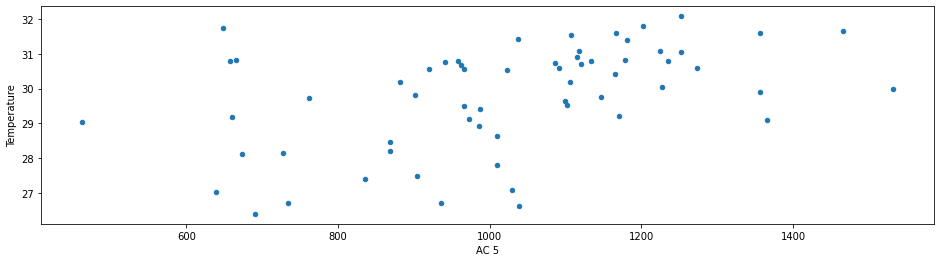

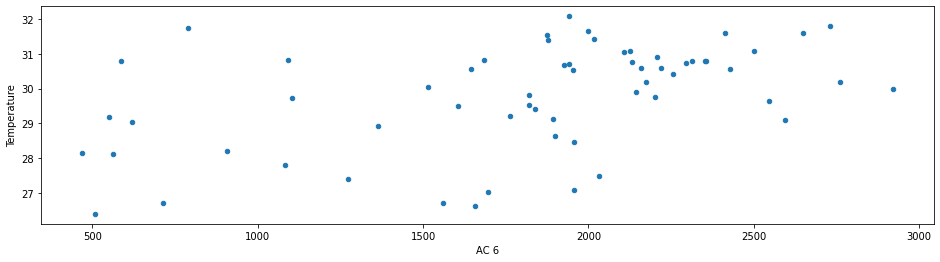

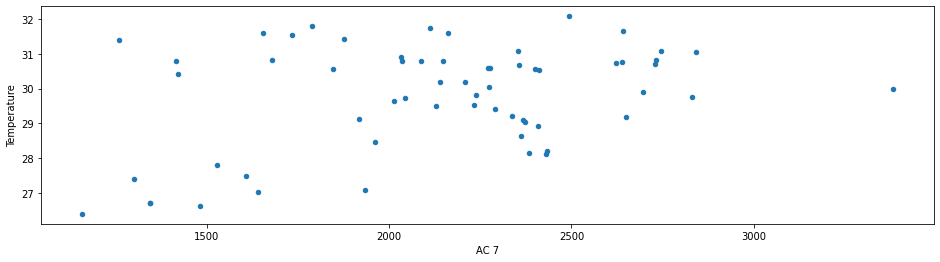

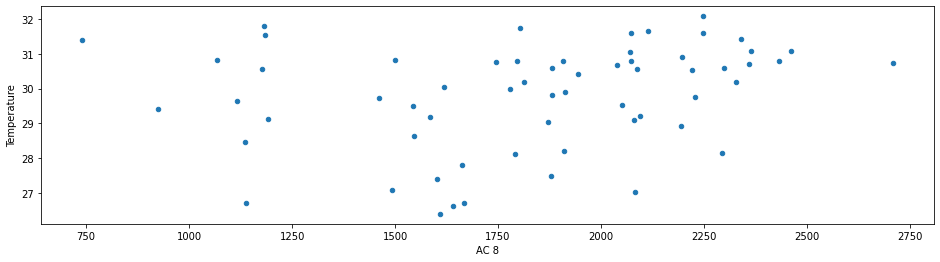

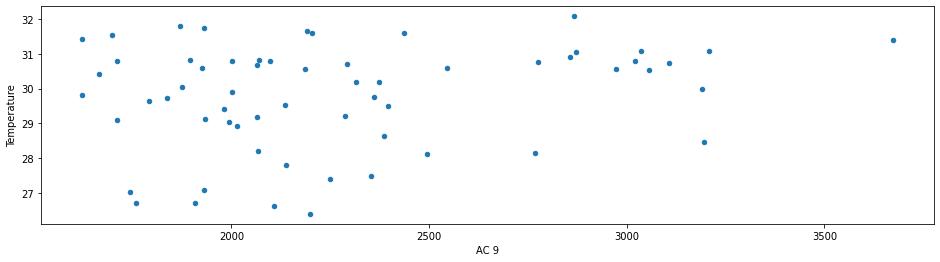

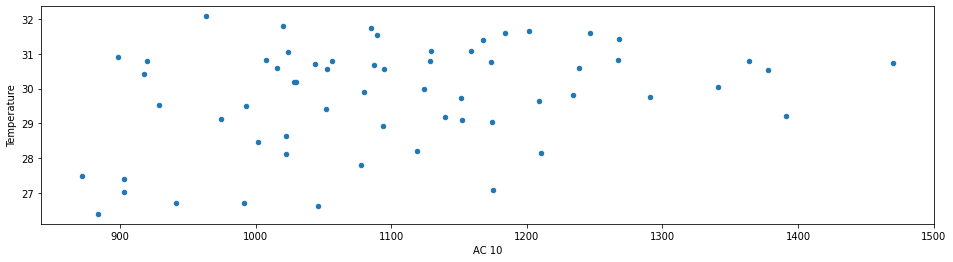

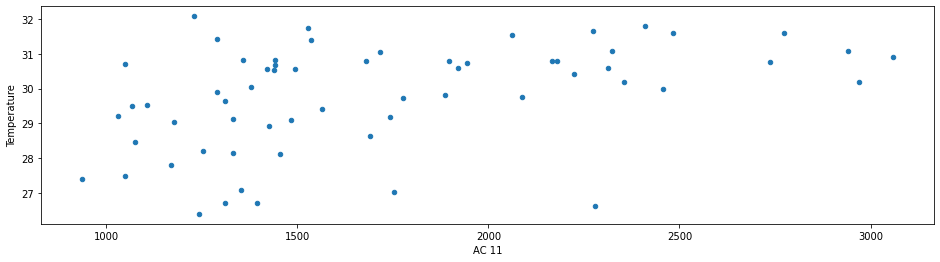

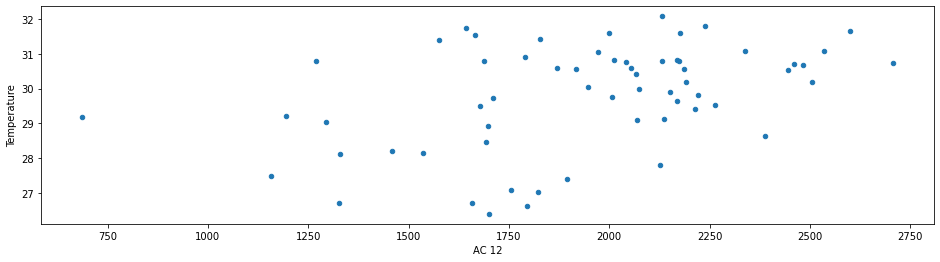

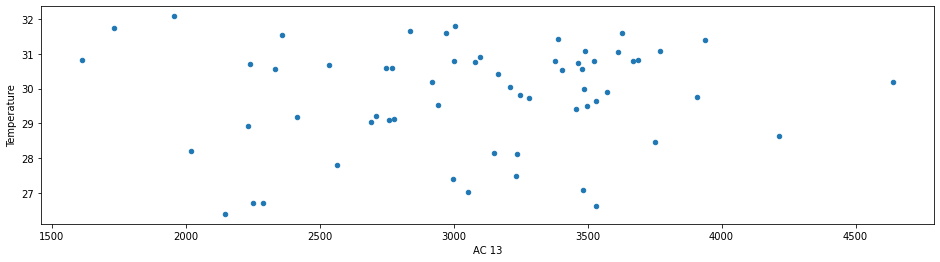

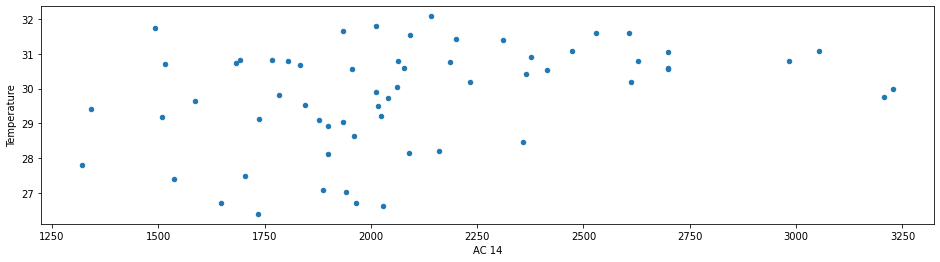

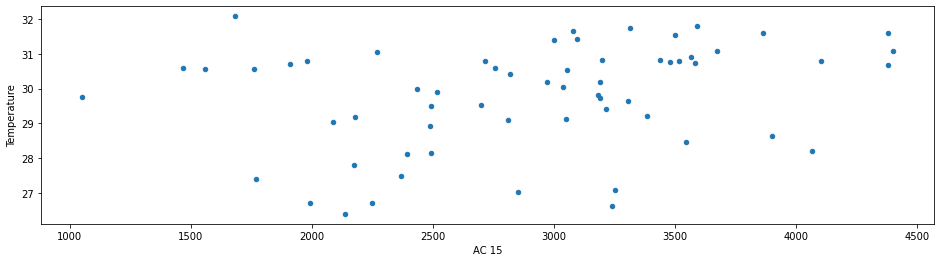

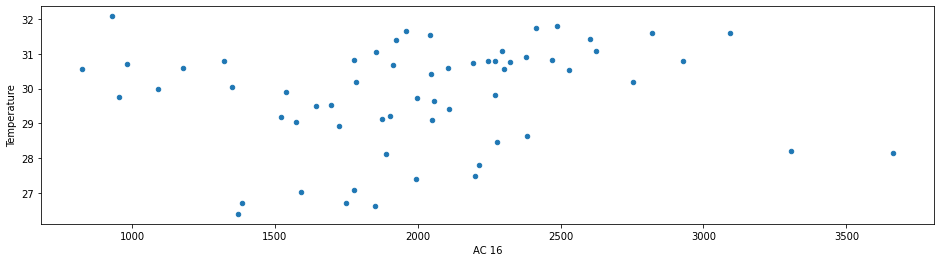

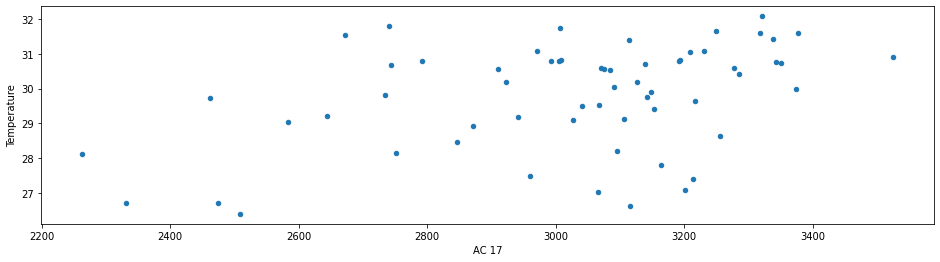

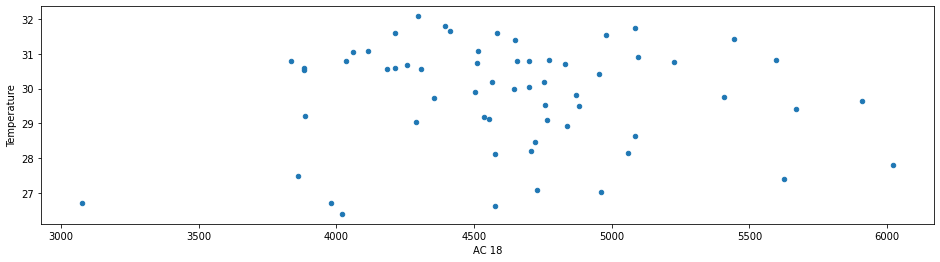

In [25]:
df1.plot(y='Temperature',figsize=(16, 4),kind='bar')
df1.plot(y='Temperature',x='Total AC',figsize=(16, 4),kind='scatter')
for i in range(18):
    df1.plot(y='Temperature',x='AC '+str(i+1),figsize=(16, 4),kind='scatter')

Theoretically, higher the temperature,higher the consumption of AC should be there
<p>By looking at the scatter chart,we can guess many things about the overall concept:-
<p>1.) Generally,plot density should be high on linear line, but this varies according to different AC.Thus we can figure out about efficiency of AC (maybe cooling system is not perfect or AC needs servicing or cold air gets lost to outside)
<p>2.) Overall Total AC vs Temperature tells us that plot density is quite around linear line hence proving our hypothesis
<p>3.)But it is not same for all AC. Some AC have dots spread over all plot area. It means that efficiency of AC (or whole system) is varing according to needs and situation
<P>4.)AC 9 is that AC which consumed less power inspite of higher temperature as most of plot density is situated at left side. 
<p>AC 17 and AC 12 plot graph does not show good results. It is consuming higher power related to Temperature as most of plot density is situated at right side
<p><p><b>Concluding this report with few precautions:-</b>
<p>1.)Data Source of temperature may be unreliable
<p>2.)Maybe I am using wrong parameter of temperature (example:- The temperature which I am using maybe mid value of whole day.Then in that case we can't use the data for comparison)

<b>Forcasting power consumption</b>
<p>By looking at the data,we can figure out that:- 
<p>1.) Overall consumption will be higher on Thursday
<p>2.) Overall consumption will be higher during night hours
<p>In short, I believe that what pattern/trend we discovered will be repeated in the future
<p> Overall speaking, forcasting power consumption depends on various other variables and factors.Biggest example:-season(AC is not used during winters) etc